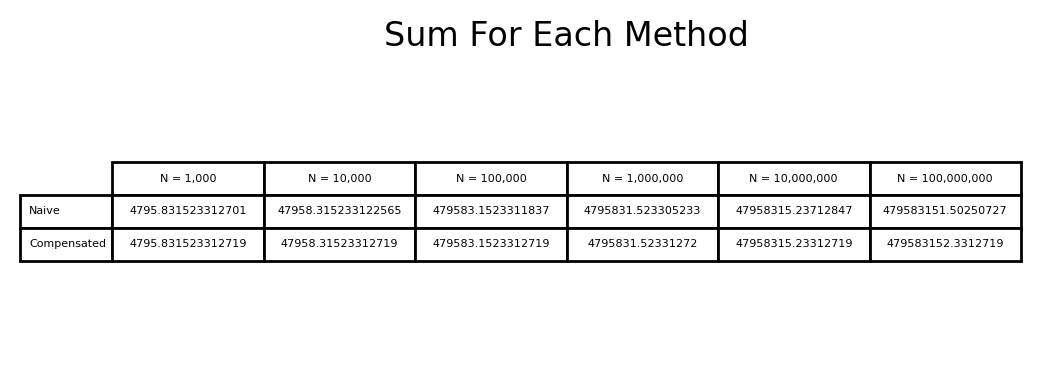

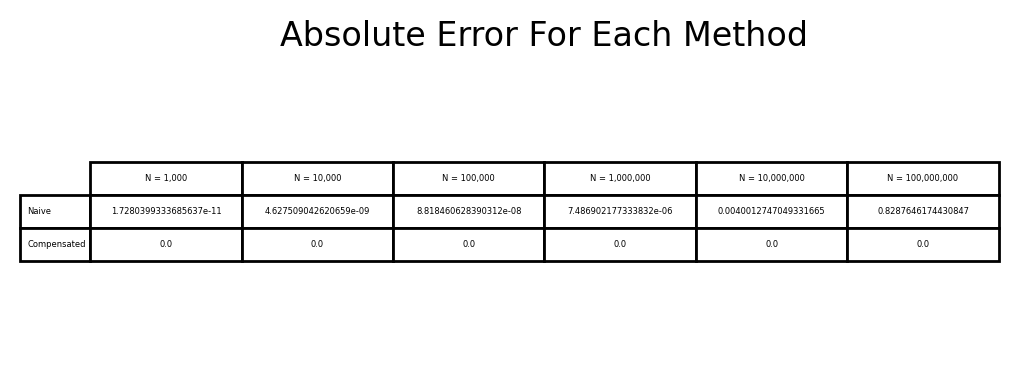

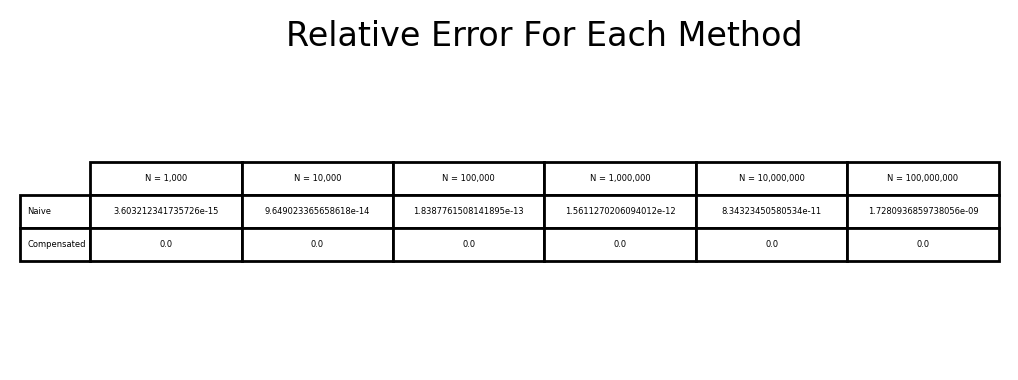

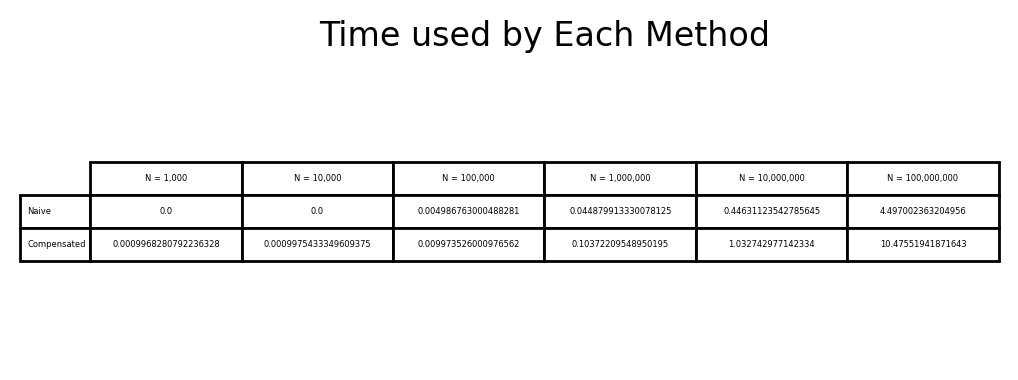

In [1]:
import time 
from math import sqrt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

#Global variables and constants
N = [10**3, 10**4, 10**5, 10**6, 10**7, 10**8]
constant = sqrt(23.0)

# Method for naive summation
def naive_summation(n):
  start_time = time.time()
  sum = 0
  for i in range(n):
    sum += constant
  elapsed_time = time.time() - start_time
  return sum, elapsed_time

# Method for the compenstated summation
def compensated_summation(n):
  start_time = time.time()
  sum, error = 0, 0
  for i in range(n):
    temp = sum
    y = constant + error
    sum = temp + y
    error = (temp - sum) + y 
  sum += error
  elapsed_time = time.time() - start_time
  return sum, elapsed_time

# Error Calculations
def absolute_error(actual, experiment):
  return abs(experiment - actual)

def relative_error(actual, experiment):
  return (absolute_error(actual, experiment) / actual) 

# Generating results from summation methods
total, abs_error, rel_error, times = [], [], [], []
for i in N:
    actual_sum = i * constant
    
    # Generating Naive Summation Results
    sum, elapsed_time = naive_summation(i)
    total.append(sum)
    times.append(elapsed_time)
    abs_error.append(absolute_error(actual_sum, sum))
    rel_error.append(relative_error(actual_sum, sum))
    
    # Generating Compensated Summation Results
    sum, elapsed_time = compensated_summation(i)
    total.append(sum)
    times.append(elapsed_time)
    abs_error.append(absolute_error(actual_sum, sum))
    rel_error.append(relative_error(actual_sum, sum))

# Putting the results into 4 tables sum, absolute error, relative error and time
methods=np.array(["Naive", "Compensated"]) 

# Table for Sum for the naive & summation methods
fig, ax = plt.subplots(dpi=200, figsize = (6,2))
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
ax.set_title("Sum For Each Method")
df = pd.DataFrame({"N = 1,000" : total[0:2:], "N = 10,000" : total[2:4:], "N = 100,000" : total[4:6:],
                   "N = 1,000,000" : total[6:8:], "N = 10,000,000" : total[8:10:], "N = 100,000,000" : total[10:12:]})
ax.table(cellText=df.values, rowLabels=methods, colLabels=df.columns, cellLoc='center', loc='center')
fig.tight_layout()
plt.show()

# Table for Absolute Error for the naive & summation methods
fig, ax = plt.subplots(dpi=200, figsize = (6,2))
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
ax.set_title("Absolute Error For Each Method")
df = pd.DataFrame({"N = 1,000" : abs_error[0:2:], "N = 10,000" : abs_error[2:4:], "N = 100,000" : abs_error[4:6:],
                   "N = 1,000,000" : abs_error[6:8:], "N = 10,000,000" : abs_error[8:10:], 
                   "N = 100,000,000" : abs_error[10:12:]})
ax.table(cellText=df.values, rowLabels=methods, colLabels=df.columns, cellLoc='center', loc='center')
fig.tight_layout()
plt.show()

# Table for Relative Error for the naive & summation methods
fig, ax = plt.subplots(dpi=200, figsize = (6,2))
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
ax.set_title("Relative Error For Each Method")
df = pd.DataFrame({"N = 1,000" : rel_error[0:2:], "N = 10,000" : rel_error[2:4:], "N = 100,000" : rel_error[4:6:],
                   "N = 1,000,000" : rel_error[6:8:], "N = 10,000,000" : rel_error[8:10:], 
                   "N = 100,000,000" : rel_error[10:12:]})
ax.table(cellText=df.values, rowLabels=methods, colLabels=df.columns, cellLoc='center', loc='center')
fig.tight_layout()
plt.show()

# Table for the time used the naive & summation methods
fig, ax = plt.subplots(dpi=200, figsize = (6,2))
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
ax.set_title("Time used by Each Method")
df = pd.DataFrame({"N = 1,000" : times[0:2:], "N = 10,000" : times[2:4:], "N = 100,000" : times[4:6:],
                   "N = 1,000,000" : times[6:8:], "N = 10,000,000" : times[8:10:], 
                   "N = 100,000,000" : times[10:12:]})
ax.table(cellText=df.values, rowLabels=methods, colLabels=df.columns, cellLoc='center', loc='center')
fig.tight_layout()
plt.show()

##### Results & Analysis

To fully understand the differences between the Naive and Compensated Summation methods, we should compare and contrast the results for each method case by case from (10^3) to (10^8) in order to get insights for each method.  

_First Case: N = 1,000 (10^3)_  
    When N = 1,000, the Naive Summation method gave us the sum of 4795.831523312701 and the Compensated Summation method gave the sum of 4795.831523312719. The results of the two methods are not similiar but not the same so let us check the absolute and relative errors to check which method more closer to the right answer. 
   The absolute error of the Naive Summation Method is 1.7280399333685637e-11, while the absolute error of the Compensated Summation method is 0.0 when N = 1,000. Clearly, the Naive Summation Method is not as accurate as the Compenstaed Summation method because Compenstaed Summation method has an error of 0 as compared to 1.7280399333685637e-11. This shows us that the Compensated Summation method is more accurate than the Naive Summation method in this case.
    The relative error of the Naive Summation Method is 3.603212341735726e-15, while the absolute error of the Compensated Summation method is 0.0 when N = 1,000. Clearly, the Naive Summation Method is not as accurate as the Compenstaed Summation method because Compenstaed Summation method has an error of 0 as compared to 3.603212341735726e-15. This shows us that the Compensated Summation method is more accurate than the Naive Summation method in this case.
    The error bound for the Naive Summation method is O(nepsilon) because the x's are all positive and the constant is also positive. Therefore, we get O(1000(1.11E-16)) = O(1.11E-13) which is actually higher than 3.603212341735726e-15, our relative error. In addition we know that the absolute error is higher than the relative error for N = 1000 in the Naive Summation method. The error for Compensated summation is 0 for absolute and relative and therefore it is most likely higher than the error or atleast equal to it. This pretty much tells us that the actual error is less than the theoretical error because our error bound is higher than the actual error. 
    The time used by the Naive Summation method was 0.0 seconds while the time used by the Compensated Summation method was 0.000997304916381836 for N = 1,000. Evidently, the Naive Summation method is faster than the Compensated Summation method for this case.  

_Second Case: N = 10,000 (10^4)_  
    When N = 10,000, the Naive Summation method gave us the sum of 47958.315233122565 and the Compensated Summation method gave the sum of 47958.31523312719. The results of the two methods are not similiar but not the same so let us check the absolute and relative errors to check which method more closer to the right answer. 
   The absolute error of the Naive Summation Method is 4.627509042620659e-09, while the absolute error of the Compensated Summation method is 0.0 when N = 10,000. Clearly, the Naive Summation Method is not as accurate as the Compenstaed Summation method because Compenstaed Summation method has an error of 0 as compared to 4.627509042620659e-09. This shows us that the Compensated Summation method is more accurate than the Naive Summation method in this case.
    The relative error of the Naive Summation Method is 9.649023365658618e-14, while the absolute error of the Compensated Summation method is 0.0 when N = 10,000. Clearly, the Naive Summation Method is not as accurate as the Compenstaed Summation method because Compenstaed Summation method has an error of 0 as compared to 9.649023365658618e-14. This shows us that the Compensated Summation method is more accurate than the Naive Summation method in this case.
    The error bound for the Naive Summation method is O(nepsilon) because the x's are all positive and the constant is also positive. Therefore, we get O(10000(1.11E-16)) = O(1.11E-12) which is actually higher than 9.649023365658618e-14, our relative error. In addition we know that the absolute error is higher than the relative error for N = 10,000 in the Naive Summation method. The error for Compensated summation is 0 for absolute and relative and therefore it is most likely higher than the error or atleast equal to it. This pretty much tells us that the actual error is less than the theoretical error because our error bound is higher than the actual error. 
    The time used by the Naive Summation method was 0.0 seconds while the time used by the Compensated Summation method was 0.0009975433349609375 for N = 10,000. Evidently, the Naive Summation method is faster than the Compensated Summation method for this case.  

_Third Case: N = 100,000 (10^5)_  
    When N = 100,000 the Naive Summation method gave us the sum of 479583.1523311837 and the Compensated Summation method gave the sum of 479583.1523312719. The results of the two methods are not similiar but not the same so let us check the absolute and relative errors to check which method more closer to the right answer. 
   The absolute error of the Naive Summation Method is 8.818460628390312e-08, while the absolute error of the Compensated Summation method is 0.0 when N = 100,000. Clearly, the Naive Summation Method is not as accurate as the Compenstaed Summation method because Compenstaed Summation method has an error of 0 as compared to 1.8387761508141895e-13. This shows us that the Compensated Summation method is more accurate than the Naive Summation method in this case.
    The relative error of the Naive Summation Method is 1.8387761508141895e-13, while the absolute error of the Compensated Summation method is 0.0 when N = 100,000. Clearly, the Naive Summation Method is not as accurate as the Compenstaed Summation method because Compenstaed Summation method has an error of 0 as compared to 1.8387761508141895e-13. This shows us that the Compensated Summation method is more accurate than the Naive Summation method in this case.
    The error bound for the Naive Summation method is O(nepsilon) because the x's are all positive and the constant is also positive. Therefore, we get O(100000(1.11E-16)) = O(1.11E-11) which is actually higher than 1.8387761508141895e-13, our relative error. In addition we know that the absolute error is higher than the relative error for N = 100,000 in the Naive Summation method. The error for Compensated summation is 0 for absolute and relative and therefore it is most likely higher than the error or atleast equal to it. This pretty much tells us that the actual error is less than the theoretical error because our error bound is higher than the actual error. 
    The time used by the Naive Summation method was 0.004986763000488281 seconds while the time used by the Compensated Summation method was 0.009973526000976562 for N = 100,000. Evidently, the Naive Summation method is faster than the Compensated Summation method for this case.  

_Fourth Case: N = 1,000,000 (10^6)_  
    When N = 1,000,000 the Naive Summation method gave us the sum of 4795831.523305233 and the Compensated Summation method gave the sum of 4795831.52331272. The results of the two methods are not similiar but not the same so let us check the absolute and relative errors to check which method more closer to the right answer. 
   The absolute error of the Naive Summation Method is 7.486902177333832e-06, while the absolute error of the Compensated Summation method is 0.0 when N = 1,000,000. Clearly, the Naive Summation Method is not as accurate as the Compenstaed Summation method because Compenstaed Summation method has an error of 0 as compared to 7.486902177333832e-06. This shows us that the Compensated Summation method is more accurate than the Naive Summation method in this case.
    The relative error of the Naive Summation Method is 1.5611270206094012e-12, while the absolute error of the Compensated Summation method is 0.0 when N = 1,000,000. Clearly, the Naive Summation Method is not as accurate as the Compenstaed Summation method because Compenstaed Summation method has an error of 0 as compared to 1.5611270206094012e-12. This shows us that the Compensated Summation method is more accurate than the Naive Summation method in this case.
    The error bound for the Naive Summation method is O(nepsilon) because the x's are all positive and the constant is also positive. Therefore, we get O(1000000(1.11E-16)) = O(1.11E-10) which is actually higher than 1.5611270206094012e-12, our relative error. In addition we know that the absolute error is higher than the relative error for N = 1,000,000 in the Naive Summation method. The error for Compensated summation is 0 for absolute and relative and therefore it is most likely higher than the error or atleast equal to it. This pretty much tells us that the actual error is less than the theoretical error because our error bound is higher than the actual error. 
    The time used by the Naive Summation method was 0.044879913330078125 seconds while the time used by the Compensated Summation method was 0.10372209548950195 for N = 1,000,000. Evidently, the Naive Summation method is faster than the Compensated Summation method for this case.  
    
_Fifth Case: N = 10,000,000 (10^7)_  
    When N = 10,000,000, the Naive Summation method gave us the sum of 47958315.23712847 and the Compensated Summation method gave the sum of 47958315.23312719. The results of the two methods are not similiar but not the same so let us check the absolute and relative errors to check which method more closer to the right answer. 
   The absolute error of the Naive Summation Method is 0.0040012747049331665, while the absolute error of the Compensated Summation method is 0.0 when N = 10,000,000. Clearly, the Naive Summation Method is not as accurate as the Compenstaed Summation method because Compenstaed Summation method has an error of 0 as compared to 1.7280399333685637e-11. This shows us that the Compensated Summation method is more accurate than the Naive Summation method in this case.
    The relative error of the Naive Summation Method is 8.34323450580534e-11, while the absolute error of the Compensated Summation method is 0.0 when N = 10,000,000. Clearly, the Naive Summation Method is not as accurate as the Compenstaed Summation method because Compenstaed Summation method has an error of 0 as compared to 8.34323450580534e-11. This shows us that the Compensated Summation method is more accurate than the Naive Summation method in this case.
    The error bound for the Naive Summation method is O(nepsilon) because the x's are all positive and the constant is also positive. Therefore, we get O(10000000(1.11E-16)) = O(1.11E-9) which is actually higher than 8.34323450580534e-11, our relative error. In addition we know that the absolute error is higher than the relative error for N = 10,000,000 in the Naive Summation method. The error for Compensated summation is 0 for absolute and relative and therefore it is most likely higher than the error or atleast equal to it. This pretty much tells us that the actual error is less than the theoretical error because our error bound is higher than the actual error. 
    The time used by the Naive Summation method was 8.34323450580534e-11 seconds while the time used by the Compensated Summation method was 1.032742977142334 for N = 10,000,000. Evidently, the Naive Summation method is faster than the Compensated Summation method for this case.  

_Sixth Case: N = 100,000,000 (10^8)_  
    When N = 100,000,000 the Naive Summation method gave us the sum of 479583151.50250727 and the Compensated Summation method gave the sum of 479583152.3312719. The results of the two methods are not similiar but not the same so let us check the absolute and relative errors to check which method more closer to the right answer. 
   The absolute error of the Naive Summation Method is 0.8287646174430847, while the absolute error of the Compensated Summation method is 0.0 when N = 100,000,000. Clearly, the Naive Summation Method is not as accurate as the Compenstaed Summation method because Compenstaed Summation method has an error of 0 as compared to 0.8287646174430847. This shows us that the Compensated Summation method is more accurate than the Naive Summation method in this case.
    The relative error of the Naive Summation Method is 1.7280936859738056e-09, while the absolute error of the Compensated Summation method is 0.0 when N = 100,000,000. Clearly, the Naive Summation Method is not as accurate as the Compenstaed Summation method because Compenstaed Summation method has an error of 0 as compared to 1.7280936859738056e-09. This shows us that the Compensated Summation method is more accurate than the Naive Summation method in this case.
    The error bound for the Naive Summation method is O(nepsilon) because the x's are all positive and the constant is also positive. Therefore, we get O(100000000(1.11E-16)) = O(1.11E-8) which is actually higher than 1.7280936859738056e-09, our relative error. In addition we know that the absolute error is higher than the relative error for N = 100,000,000 in the Naive Summation method. The error for Compensated summation is 0 for absolute and relative and therefore it is most likely higher than the error or atleast equal to it. This pretty much tells us that the actual error is less than the theoretical error because our error bound is higher than the actual error. 
    The time used by the Naive Summation method was 4.497002363204956 seconds while the time used by the Compensated Summation method was 10.47551941871643 for N = 100,000,000. Evidently, the Naive Summation method is faster than the Compensated Summation method for this case.    
 
Analysis of all cases:       
After testing all the cases we have the question, are these errors consistent with the expressions for errors that we
discussed in class and that are in the posted classroom presentations? Essentially, yes all the errors are consistent witht he expressions for error discussed in class because the actual error is lower than the theoretical error because for every case it was shown that the relative error is less than the error bound and in fact the relative error is also lower than the absolute error.  

Another questions we have is, How do the speeds of the two methods compare?  
The speeds of the two methods are clear because the cases showed a clear trend, the Naive Summation was faster than the Compensated Summation Method because in all cases the Naive Summation methods finished quicker. Although the Naive Summation method is faster than the Compensated Summation method, the Compensated Summation method is more accurate because it adds an extra error to reduce to the error possible.

Additional Analysis Notes:
The trends of the cases show that Compensated Summation Method has a relative and absolute error of zero and that is because the method reduces error in a fancy way by adding it to the summation, which is why the Compensated Summation method is slower but more accurate than the Naive Summation method.